In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
from mppi import InputFiles as I, Calculators as C, Utilities as U, Parsers as P
from mppi.Calculators import Tools
import matplotlib.pyplot as plt
## use ipyml for interactive plots
%matplotlib inline  
import numpy as np
import os

In [3]:
omp = 1
mpi = 4

# Tutorial of the YamboParser class

This tutorial describes the usage of the YamboParser class. The parser contains instances 
of several classes, namely : 
* the YamboOutputParser that deals with the o- file(s) produced by a yambo computation
* the YamboDipolesParser that parse the dipoles database created by Yambo
* the YamboDftParser that extract lattice and electronic information (ad the dft level) from the
  ns.db1 database written by Yambo in the SAVE folder

The class is designed to deal with the output of the run method of YamboCalculator.

Here we present a first example by performing a gw calculation:

In [5]:
rr = C.RunRules(mpi=mpi,omp_num_threads=omp)
code = C.YamboCalculator(rr)

Initialize a Yambo calculator with scheduler direct


In [6]:
input_dir = 'QeCalculator_test/outdir_nscf/bands_8.save'

In [7]:
run_dir = 'YamboCalculator_test'
Tools.init_yambo_dir(yambo_dir=run_dir,input_dir=input_dir,overwrite_if_found=False)

SAVE folder YamboCalculator_test/SAVE already present. No operations performed.


In [8]:
inp = I.YamboInput(args='yambo -d -k hartee -g n -p p -V qp',folder=run_dir)
inp.set_kRange(1,2)
#inp

In [37]:
results = code.run(input = inp, run_dir = run_dir, name='qp_test1')
results

Skip the run of qp_test1


{'output': {'qp': 'YamboCalculator_test/qp_test1/o-qp_test1.qp'},
 'report': 'YamboCalculator_test/qp_test1/r-qp_test1_HF_and_locXC_gw0_dyson_em1d_ppa_el_el_corr',
 'dft': 'YamboCalculator_test/SAVE/ns.db1',
 'QP': 'YamboCalculator_test/qp_test1/ndb.QP',
 'HF_and_locXC': 'YamboCalculator_test/qp_test1/ndb.HF_and_locXC',
 'dipoles': 'YamboCalculator_test/qp_test1/ndb.dipoles',
 'pp': 'YamboCalculator_test/qp_test1/ndb.pp'}

The calculator contain the references to the o- files and database with the output data.
The parser extract the data from the files, as follows

In [38]:
P.YamboParser?

Init signature: P.YamboParser(results, verbose=False, extendOut=True)
Docstring:     
Class that perform the parsing starting from the results :py:class:`dict` built
by the :class:`YamboCalculator` class. In the actual implementation of the class the
parser is able to deal with the o- files, the dipoles database, the ``ndb.RT_G_PAR``
and the ``ns.db1`` database written in the SAVE folder.

Args:
    results (:py:class:`dict`): The dictionary of the results built by the
        :class:`YamboCalculator` class
    verbose (:py:class:`boolean`) : Determine the amount of information provided on terminal
    extendOut (:py:class:`boolean`) : Determine which dictionary is used as reference for the
                    names of the variables in the :class:`YamboOutputParser`

Attributes:
    data (:class:`YamboOutputParser`) : contains the instance of the :class:`YamboOutputParser`
        class that manage the parsing of the ``o-* files``
    dipoles (:class:`YamboDipolesParser`) : contains th

Note that the extendOut option has to chosen in agreement with the one the input, otherwise
the parser atribute the name of the variables of the o- files in an erroneous way

In [39]:
data = P.YamboParser(results,extendOut=False,verbose=True)

Parse file YamboCalculator_test/qp_test1/o-qp_test1.qp
Parse file : YamboCalculator_test/SAVE/ns.db1
Parse file : YamboCalculator_test/qp_test1/ndb.QP
Parse file : YamboCalculator_test/qp_test1/ndb.dipoles
Spin dipoles not found in the ndb.dipoles


Some information on the parsed data can be obtained using the get_info method of the class

In [40]:
data.get_info()

YamboOutputParser variables structure
suffix qp with dict_keys(['kpoint', 'band', 'E0', 'EmE0', 'sce0'])
 
YamboDipolesParser variables structure
dip_ir shape (32, 4, 4, 3, 2)
dip_p shape (32, 4, 4, 3, 2)
dip_v shape (32, 4, 4, 3, 2)
dip_spin shape (1,)
 
YamboDftParser variables structure
number of k points 32
number of bands 8
spin degeneration 1
 
YamboQPParser variables structure
QP_table shape (16, 3)
QP_kpts shape (32, 3)
QP_E shape (16, 2)
QP_Eo shape (16,)
QP_Z shape (16, 2)
 


Data are encapsulated in the attributes of the class, for instance

In [23]:
data.data

{'qp': {'kpoint': array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.]),
  'band': array([1., 2., 3., 4., 5., 6., 7., 8., 1., 2., 3., 4., 5., 6., 7., 8.]),
  'E0': array([-1.189685e+01, -1.216440e-06,  0.000000e+00,  0.000000e+00,
          2.565152e+00,  2.565152e+00,  2.565152e+00,  3.146653e+00,
         -1.153855e+01, -2.375836e+00, -4.453420e-01, -4.453410e-01,
          2.294498e+00,  3.205499e+00,  3.205499e+00,  5.284825e+00]),
  'EmE0': array([-1.564291,  0.722413,  0.741914,  0.741673,  1.86755 ,  1.867259,
          1.829724,  2.395583, -1.427122,  0.369035,  0.648066,  0.670303,
          1.853613,  1.981288,  1.955341,  2.673125]),
  'sce0': array([ 4.57619 ,  2.008809,  2.031459,  2.031144, -2.003587, -2.003874,
         -2.046769, -1.926959,  4.600586,  2.457894,  2.028683,  2.054817,
         -1.999774, -2.067204, -2.096922, -1.932993])}}

In [13]:
data.dft

In [14]:
data.dipoles

In what follows we describe the features of the various classes using dedicated examples

A YamboParser object can be also instanciated directly using the name of the folders that contain the
o-* files and the databases, for instance

In [52]:
outputPath = 'YamboCalculator_test/qp_test1'

In [53]:
data2 = P.YamboParser.from_path(run_dir=run_dir,outputPath=outputPath,verbose=True,extendOut=False)

Parse file YamboCalculator_test/qp_test1/o-qp_test1.qp
Parse file : YamboCalculator_test/SAVE/ns.db1
Parse file : YamboCalculator_test/qp_test1/ndb.QP
Parse file : YamboCalculator_test/qp_test1/ndb.dipoles
Spin dipoles not found in the ndb.dipoles


In [54]:
data2.get_info()

YamboOutputParser variables structure
suffix qp with dict_keys(['kpoint', 'band', 'E0', 'EmE0', 'sce0'])
 
YamboDipolesParser variables structure
dip_ir shape (32, 4, 4, 3, 2)
dip_p shape (32, 4, 4, 3, 2)
dip_v shape (32, 4, 4, 3, 2)
dip_spin shape (1,)
 
YamboDftParser variables structure
number of k points 32
number of bands 8
spin degeneration 1
 
YamboQPParser variables structure
QP_table shape (16, 3)
QP_kpts shape (32, 3)
QP_E shape (16, 2)
QP_Eo shape (16,)
QP_Z shape (16, 2)
 


## Analysis of the YamboOutputParser class

The class is designed to deal with the list of o- files produced by Yambo
We present some example:

In [25]:
qp_output = {'qp' : 'YamboParser_test/qp_results/o-qp_test1.qp'}

In [26]:
qp_output_extendOut = {'qp' : 'YamboCalculator_test/qp_test_ExtendOut/o-qp_test_ExtendOut.qp'}

In [37]:
rt_output = {'carriers':'YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.carriers',
             'spin_magnetization':'YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.spin_magnetization',
             'external_field':'YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.external_field',
             'polarization':'YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.polarization'}

When the list of files is passed to the parser the extendOut option used to run the computation has to be provided,
otherwise the parser could perform a wrong assignement of the names of the variables. 

In [27]:
P.YamboOutputParser?

Init signature: P.YamboOutputParser(output, verbose=True, extendOut=True)
Docstring:     
Class that performs the parsing of a Yambo o- file(s). The class ineriths from :py:class:`dict`
and the instance of the class is a dictionary with the data. The keys correspond to the extension
of the parsed files.

Args:
    output (:py:class:`list`): Dictionary with the structure of the output of :py:meth:`get_output_files`
        of the `YamboCalculator` module.
    verbose (:py:class:`boolean`) : Determine the amount of information provided on terminal
    extendOut (:py:class:`boolean`) : Determine which dictionary is used as reference for the
                    names of the variables
Init docstring: Initialize the data member of the class.
File:           ~/Applications/MPPI/mppi/Parsers/YamboOutputParser.py
Type:           type
Subclasses:     


In [29]:
results = P.YamboOutputParser(output=qp_output,extendOut=False)

Parse file YamboParser_test/qp_results/o-qp_test1.qp


results is a dictionary with the structure

In [30]:
results

{'qp': {'kpoint': array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.]),
  'band': array([1., 2., 3., 4., 5., 6., 7., 8., 1., 2., 3., 4., 5., 6., 7., 8.]),
  'E0': array([-1.190291e+01, -1.176000e-05, -1.176000e-05,  0.000000e+00,
          2.551225e+00,  2.551230e+00,  2.551230e+00,  3.152071e+00,
         -1.110872e+01, -3.914389e+00, -7.552550e-01, -7.552460e-01,
          1.962407e+00,  3.490390e+00,  3.490396e+00,  6.757975e+00]),
  'EmE0': array([-1.50691 ,  0.7861  ,  0.7914  ,  0.7771  ,  1.884047,  1.907533,
          1.906476,  2.349819, -1.21027 ,  0.216875,  0.676644,  0.653277,
          1.799721,  2.065016,  2.084261,  2.726886]),
  'sce0': array([ 4.48108 ,  2.194   ,  2.201   ,  2.184061, -2.137494, -2.110904,
         -2.112035, -2.203245,  4.52994 ,  2.934759,  2.263484,  2.236098,
         -2.186759, -2.20382 , -2.182057, -2.267519])}}

For several usages it can be useful to access to the results with the object.attribute sintax. 
In this case it is possible to use the AttributeDict class the perform this conversion

In [33]:
obj = U.AttributeDict(**results)

and we can access as

In [34]:
obj.qp.E0

array([-1.190291e+01, -1.176000e-05, -1.176000e-05,  0.000000e+00,
        2.551225e+00,  2.551230e+00,  2.551230e+00,  3.152071e+00,
       -1.110872e+01, -3.914389e+00, -7.552550e-01, -7.552460e-01,
        1.962407e+00,  3.490390e+00,  3.490396e+00,  6.757975e+00])

Test of a parsing with extendOut = True

In [35]:
results = P.YamboOutputParser(output=qp_output_extendOut,extendOut=True)

Parse file YamboCalculator_test/qp_test_ExtendOut/o-qp_test_ExtendOut.qp


now all the variables are available, for instance

In [36]:
results['qp']['z_Re']

array([0.724502, 0.846966, 0.847311, 0.847307, 0.839802, 0.839785,
       0.839137, 0.853679, 0.719236, 0.823056, 0.842047, 0.842398,
       0.844161, 0.839568, 0.839091, 0.850125])

Let's see a further example by parsing the typical files of a real-time computation

In [38]:
results = P.YamboOutputParser(rt_output)

Parse file YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.carriers
Parse file YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.spin_magnetization
Parse file YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.external_field
Parse file YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.polarization


In this case we have several files, so the dictionary has more than one key

In [39]:
results.keys()

dict_keys(['carriers', 'spin_magnetization', 'external_field', 'polarization'])

We can easily perform some plots

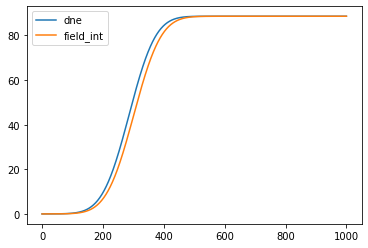

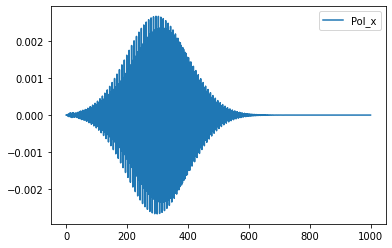

In [40]:
time = results['carriers']['time']
elec = results['carriers']['dne']
field_int = results['external_field']['Intensity']
pol = results['polarization']['Pol_x']

ratio = max(field_int)/max(elec)

plt.plot(time,ratio*elec,label='dne')
plt.plot(time,field_int,label='field_int')
plt.legend()
plt.show()

plt.plot(time,pol,label='Pol_x')
plt.legend()

Again we can access to the results using the attribute syntax. For instance if we are intersted to the spin_magnetization
part of the resutls we can set

In [41]:
spin_results = U.AttributeDict(**results['spin_magnetization'])

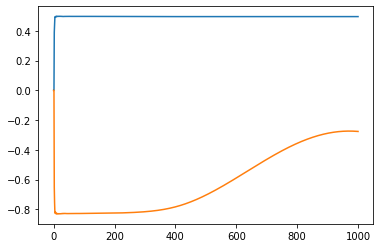

In [42]:
plt.plot(spin_results.time,spin_results.Mc_z)
plt.plot(spin_results.time,spin_results.Mv_z)

###  YamboOutputParser for a ypp computation

We test the functionality of the Parser to deal with the output of a ypp -s b computation for plotting the bands structure along a path

In [43]:
bands_output = {'bands_interpolated':'YamboCalculator_test/bands_test1/o-bands_test1.bands_interpolated'}

In [44]:
results = P.YamboOutputParser(bands_output)

Parse file YamboCalculator_test/bands_test1/o-bands_test1.bands_interpolated


For instance

In [45]:
results['bands_interpolated']['col0'] # kpath

array([0.        , 0.04593836, 0.09187671, 0.13781506, 0.18375342,
       0.22969177, 0.27563013, 0.32156848, 0.36750684, 0.41344519,
       0.45938355, 0.5053219 , 0.55126025, 0.59719861, 0.64313696,
       0.68907532, 0.73501367, 0.78095203, 0.82689038, 0.87282874,
       0.91876709, 0.96470544, 1.0106438 , 1.0565822 , 1.1017687 ,
       1.1469552 , 1.19214171, 1.23732823, 1.28251474, 1.32770126,
       1.37288778, 1.4180743 , 1.46326081, 1.50844733, 1.55363385,
       1.59882037, 1.64400689, 1.6891934 , 1.73437992, 1.77956644,
       1.82475296, 1.86993948, 1.91512599, 1.96031251, 2.005499  ,
       2.05068555, 2.09587206, 2.14105858, 2.1862451 , 2.2314316 ,
       2.2766181 , 2.3235426 , 2.3704671 , 2.41739152, 2.46431598,
       2.51124044, 2.5581649 , 2.60508936, 2.65201382, 2.69893828,
       2.74586274, 2.79278721, 2.83971167, 2.88663613, 2.93210418,
       2.97757224, 3.0230403 , 3.06850835, 3.11397641, 3.15944447,
       3.20491252, 3.25038058, 3.29584864, 3.34131669, 3.38678

In [46]:
results['bands_interpolated']['col1'] # energies of the first band included in the computation

array([-1.35540660e-06, -1.35540660e-06, -2.37583629e+00, -2.37583629e+00,
       -2.37583629e+00, -2.37583629e+00, -5.30497690e+00, -5.30497690e+00,
       -5.30497690e+00, -5.30497690e+00, -4.42422173e+00, -4.42422173e+00,
       -2.05464056e+00, -2.05464056e+00, -5.30497690e+00, -5.30497690e+00,
       -5.30497690e+00, -5.30497690e+00, -2.37583629e+00, -2.37583629e+00,
       -2.37583629e+00, -2.37583629e+00, -1.35540660e-06, -1.35540660e-06,
       -1.35540660e-06, -1.35540660e-06, -2.05464056e+00, -2.05464056e+00,
       -2.05464056e+00, -2.05464056e+00, -5.00667257e+00, -5.00667257e+00,
       -5.00667257e+00, -5.00667257e+00, -5.00667257e+00, -7.78724511e+00,
       -7.78724511e+00, -7.78724511e+00, -7.78724511e+00, -5.00667257e+00,
       -5.00667257e+00, -5.00667257e+00, -5.00667257e+00, -5.00667257e+00,
       -1.35540660e-06, -2.05464056e+00, -2.05464056e+00, -2.05464056e+00,
       -1.35540660e-06, -1.35540660e-06, -1.35540660e-06, -1.35540660e-06,
       -1.35540660e-06, -

The parser cannot determine the names of the columns because the number of colums depend on the
number of bands considered. The meaning of the columns can be identified by knowing the input used to 
perform the post processing. 

In [47]:
r = results['bands_interpolated']
kpath = r['col0']
band3 = r['col1']
band4 = r['col2']
band5 = r['col3']
band6 = r['col4']

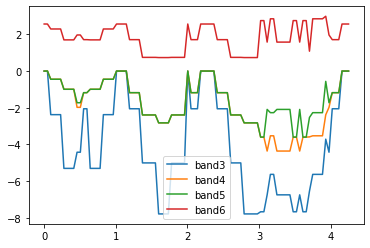

In [48]:
plt.plot(kpath,band3,label='band3')
plt.plot(kpath,band4,label='band4')
plt.plot(kpath,band5,label='band5')
plt.plot(kpath,band6,label='band6')
plt.legend()

## Analysis of the YamboDipolesParser class

To analyze the YamboDipolesParser we build the dipoles using Yambo. We start from a nscf
computation on GaAs on a regular grid with 12 bands (8 full and 4 empties, since the bands
are spin splitted)

In [ ]:
source_dir = 'Pw_bands/gaas_nscf_so.save'
save_dir = Tools.make_p2y(source_dir,overwrite_if_found=False)

In [54]:
run_dir = 'YamboParser_test/DipolesParser'
Tools.init_yambo_run_dir(save_dir,run_dir,overwrite_if_found=False,make_link=True)

Create folder YamboParser_test/DipolesParser
Executing command: cd Pw_bands/gaas_nscf_so.save; p2y
Create a symlink of /home/marco/Applications/MPPI/sphinx_source/tutorials/Pw_bands/gaas_nscf_so.save/SAVE in YamboParser_test/DipolesParser
Executing command: cd YamboParser_test/DipolesParser;OMP_NUM_THREADS=1 mpirun -np 1 yambo


In [55]:
inp = I.YamboInput(args='yambo -dipoles -V all',folder=run_dir)
inp['variables']['DipComputed'] = 'R P V Spin'
inp['arguments'].append("DipBandsALL")
inp

{'args': 'yambo -dipoles -V all',
 'folder': 'YamboParser_test/DipolesParser',
 'filename': 'yambo.in',
 'arguments': ['DipBandsALL'],
 'variables': {'StdoHash': [40.0, ''],
  'Nelectro': [8.0, ''],
  'ElecTemp': [0.0, 'eV'],
  'BoseTemp': [-1.0, 'eV'],
  'OccTresh': [1e-05, ''],
  'NLogCPUs': [0.0, ''],
  'MEM_tresh': [51200.0, 'Kb'],
  'DIP_Threads': [0.0, ''],
  'DipoleEtresh': [1e-05, 'eV'],
  'DBsIOoff': 'none',
  'DBsFRAGpm': 'none',
  'PAR_def_mode': 'balanced',
  'DipComputed': 'R P V Spin',
  'DipBands': [[1, 12], '']}}

Note that the options ``DipBandsALL`` enables the computation of the dipoles elements among all the bands, and not
only in for the full-empty couples

In [56]:
code.run(input=inp,run_dir=run_dir,name='dipoles',mpi=1,skip=False)

run command: mpirun -np 1 yambo -F dipoles.in -J dipoles -C dipoles
computation dipoles is running...
computation dipoles ended

        There are no o-* files.
        Maybe you have performed a ypp computation or wait_end_run and/or
        the dry_run option are active.
        Otherwise a possible error has occured during the computation
        
Run performed in 06s


{'output': {},
 'report': 'YamboParser_test/DipolesParser/dipoles/r-dipoles_dipoles',
 'dft': 'YamboParser_test/DipolesParser/SAVE/ns.db1',
 'dipoles': 'YamboParser_test/DipolesParser/dipoles/ndb.dipoles'}

Once that the computation is over, and the database is built by Yambo we parse it

In [57]:
dipole_file = os.path.join(run_dir,'dipoles/ndb.dipoles')

In [58]:
dipoles = P.YamboDipolesParser(dipole_file)

Parse file : YamboParser_test/DipolesParser/dipoles/ndb.dipoles


In [59]:
dipoles.get_info()

YamboDipolesParser variables structure
dip_ir shape (16, 12, 12, 3, 2)
dip_p shape (16, 12, 12, 3, 2)
dip_v shape (16, 12, 12, 3, 2)
dip_spin shape (16, 12, 12, 3, 2)


We consider the r dipole (x component) and look for the values of the valence->conduction
elements

In [63]:
k = 0
vb = 7
cb = 8
print(dipoles.r_dipole(k,vb,cb,0))
print(dipoles.r_dipole(k,cb,vb,0))

[[[ 0.00000000e+00+0.00000000e+00j -7.32989130e+00-1.04414460e+00j
   -2.67618113e-04-2.73337086e-02j -8.31398256e-01-8.24659863e-01j
    1.54225410e-02+5.53155198e-01j -8.47292442e-03-3.52913430e-02j
    3.94122962e-02+4.51266933e-01j -3.50684921e-02-4.23464784e-02j
   -3.27529949e-03+3.62501186e-03j  3.12675546e-02-8.78397798e-02j
   -6.91983853e-03-5.34757557e-03j  5.07940800e-03-9.23038442e-02j]
  [-7.32989130e+00+1.04414460e+00j  0.00000000e+00+0.00000000e+00j
    8.01318921e-01+8.54408462e-01j -3.56489315e-02-9.21653706e-03j
   -9.18567469e-03-1.86620892e-02j  5.51941446e-01+1.59714051e-03j
   -8.44179368e-03-1.80563835e-02j -4.53646536e-01+2.62720464e-02j
   -3.27381201e-02-8.40906364e-02j  2.53831680e-03-5.56781058e-03j
    2.48079709e-02-9.19902074e-02j  5.51535117e-03+1.76623507e-03j]
  [-2.67618113e-04+2.73337086e-02j  8.01318921e-01-8.54408462e-01j
    0.00000000e+00+0.00000000e+00j  1.89030428e+00+4.66548965e-01j
    5.79517535e-02+7.19914584e-02j  2.97413490e-01+5.3756765

we observe that inverting the order of the bands changes sign to the imaginary part of the matrix
element, as expected.

## Analysis of the YamboDftParser class

This database collects information about the lattice and electronic properties
of the system.

The information codified in this database are usually equivalent to the ones in the QuantumESPRESSO
data-file-schema.xml and the YamboDftParser shares many common functions with the PwParser.

To perform a comparison we consider the example of bulk WSe2, that has a exaghonal symmetry (ibrav=4 in pw input) with
layered structure in the $z$ direction. We consider a 12x12x3 $k$-sampling with 100 bands and we compare the `data-file-schema.xml` and
the `ns.db1` database.

In [30]:
xml = 'YamboParser_test/dftParsers_results/WSe2_12x12x3_100bands/data-file-schema.xml'
nsdb = 'YamboParser_test/dftParsers_results/WSe2_12x12x3_100bands/ns.db1'

In [31]:
pw_data = P.PwParser(xml)
yambo_data = P.YamboDftParser(nsdb)

Parse file : YamboParser_test/dftParsers_results/WSe2_12x12x3_100bands/data-file-schema.xml
Parse file : YamboParser_test/dftParsers_results/WSe2_12x12x3_100bands/ns.db1


In [32]:
print(yambo_data.alat)
print(yambo_data.lattice)
print(yambo_data.nbands)
print(yambo_data.nbands_full)
print(yambo_data.spin_degen)
print(len(yambo_data.syms))
yambo_data.syms[1]

[ 6.198302   5.3678865 24.483292 ]
[[ 6.198302   0.         0.       ]
 [-3.099151   5.3678865  0.       ]
 [ 0.         0.        24.483292 ]]
100
52
1
12


array([[ 1.0000001,  0.       ,  0.       ],
       [ 0.       , -1.       ,  0.       ],
       [ 0.       ,  0.       , -1.0000001]], dtype=float32)

In [33]:
print(pw_data.alat)
print(pw_data.lattice)

6.198301719262
[[ 6.19830172  0.          0.        ]
 [-3.09915086  5.36788675  0.        ]
 [ 0.          0.         24.48329179]]


__Note that Yambo uses a vector alat variable. For this reason if we compare the expression of the lattice vector expressed in units of alat and the 
ones of the reciprocal axis vector expressed in units of 2$\pi$/alat they have different components. This can be confirmed by looking in the log and
in r_setup file in the folder `YamboParser_test/dftParsers_results/WSe2_12x12x3_100bands`.__

In [34]:
pw_data.get_lattice(rescale=True)

array([[ 1.       ,  0.       ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  3.95     ]])

In [35]:
yambo_data.get_lattice(rescale=True)

array([[ 1.       ,  0.       ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  3.9499998]], dtype=float32)

Note that the get_lattice method of yambo_data rescale the lattice vectors w.r.t the first component of the vector alat parameter of yambo, so the result is equivalent to the one of the pw_data class.

Due to the same approach also the reciprocal lattice are consistent in the two classes

In [36]:
pw_data.get_reciprocal_lattice(rescale=True)

array([[ 1.        ,  0.57735027, -0.        ],
       [ 0.        ,  1.15470054,  0.        ],
       [ 0.        , -0.        ,  0.25316456]])

In [37]:
yambo_data.get_reciprocal_lattice(rescale=True)

array([[ 1.        ,  0.5773503 , -0.        ],
       [ 0.        ,  1.1547006 ,  0.        ],
       [ 0.        , -0.        ,  0.25316456]], dtype=float32)

We also compare the expressions of the k-points

In [38]:
pw_data.kpoints[0:20]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.08438819],
       [ 0.        ,  0.09622504,  0.        ],
       [ 0.        ,  0.09622504,  0.08438819],
       [ 0.        ,  0.19245009,  0.        ],
       [ 0.        ,  0.19245009,  0.08438819],
       [ 0.        ,  0.28867513,  0.        ],
       [ 0.        ,  0.28867513,  0.08438819],
       [ 0.        ,  0.38490018,  0.        ],
       [ 0.        ,  0.38490018,  0.08438819],
       [ 0.        ,  0.48112522,  0.        ],
       [ 0.        ,  0.48112522,  0.08438819],
       [ 0.        , -0.57735027,  0.        ],
       [ 0.        , -0.57735027,  0.08438819],
       [ 0.08333333,  0.14433757,  0.        ],
       [ 0.08333333,  0.14433757,  0.08438819],
       [ 0.08333333,  0.24056261,  0.        ],
       [ 0.08333333,  0.24056261,  0.08438819],
       [ 0.08333333,  0.33678766,  0.        ],
       [ 0.08333333,  0.33678766,  0.08438819]])

In [39]:
yambo_data.kpoints[0:20]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.33333334],
       [ 0.        ,  0.08333333,  0.        ],
       [ 0.        ,  0.08333333,  0.33333334],
       [ 0.        ,  0.16666666,  0.        ],
       [ 0.        ,  0.16666666,  0.33333334],
       [ 0.        ,  0.24999999,  0.        ],
       [ 0.        ,  0.24999999,  0.33333334],
       [ 0.        ,  0.3333333 ,  0.        ],
       [ 0.        ,  0.3333333 ,  0.33333334],
       [ 0.        ,  0.41666666,  0.        ],
       [ 0.        ,  0.41666666,  0.33333334],
       [ 0.        , -0.49999997,  0.        ],
       [ 0.        , -0.49999997,  0.33333334],
       [ 0.08333334,  0.12499999,  0.        ],
       [ 0.08333334,  0.12499999,  0.33333334],
       [ 0.08333334,  0.20833333,  0.        ],
       [ 0.08333334,  0.20833333,  0.33333334],
       [ 0.08333334,  0.29166666,  0.        ],
       [ 0.08333334,  0.29166666,  0.33333334]], dtype=float32)

Which are different because they represent the cart. coord. in units 2pi/alat and again yambo uses a vector alat.

In [40]:
yambo_data.get_kpoints(use_scalar_alat=True)[0:20]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.08438819],
       [ 0.        ,  0.09622505,  0.        ],
       [ 0.        ,  0.09622505,  0.08438819],
       [ 0.        ,  0.19245009,  0.        ],
       [ 0.        ,  0.19245009,  0.08438819],
       [ 0.        ,  0.28867513,  0.        ],
       [ 0.        ,  0.28867513,  0.08438819],
       [ 0.        ,  0.38490018,  0.        ],
       [ 0.        ,  0.38490018,  0.08438819],
       [ 0.        ,  0.48112527,  0.        ],
       [ 0.        ,  0.48112527,  0.08438819],
       [ 0.        , -0.57735026,  0.        ],
       [ 0.        , -0.57735026,  0.08438819],
       [ 0.08333334,  0.14433756,  0.        ],
       [ 0.08333334,  0.14433756,  0.08438819],
       [ 0.08333334,  0.24056263,  0.        ],
       [ 0.08333334,  0.24056263,  0.08438819],
       [ 0.08333334,  0.33678767,  0.        ],
       [ 0.08333334,  0.33678767,  0.08438819]], dtype=float32)

In this way the components are equal to the ones of the pw_data class.

The class contain also methods to compute the lattice volume

In [27]:
yambo_data.eval_lattice_volume(rescale=False)

814.6027

In [28]:
pw_data.eval_lattice_volume(rescale=False)

814.6027389471978

In [25]:
yambo_data.eval_reciprocal_lattice_volume(rescale=True)

0.29232928

In [26]:
pw_data.eval_reciprocal_lattice_volume(rescale=True)

0.2923292502226171

Lastly, we show the kpoints distribution after a Fixsymm procedure. We use the same WSe2 calculation but we load the ndb
obtained after the Fixsymm.

In [12]:
dft_ndb = 'YamboParser_test/rt_results/ns.db1'
fixsymm_data = P.YamboDftParser(dft_ndb)

Parse file : YamboParser_test/rt_results/ns.db1


In [13]:
kpoints = fixsymm_data.get_kpoints(use_scalar_alat=True)

In [14]:
# in cartesian coordinates
Gamma = np.array([0.,0.,0.])
K = np.array([1/3.,1/np.sqrt(3.),0])
M = np.array([0.,1/np.sqrt(3.),0])

In [15]:
numk = kpoints.shape[0]
numk

222

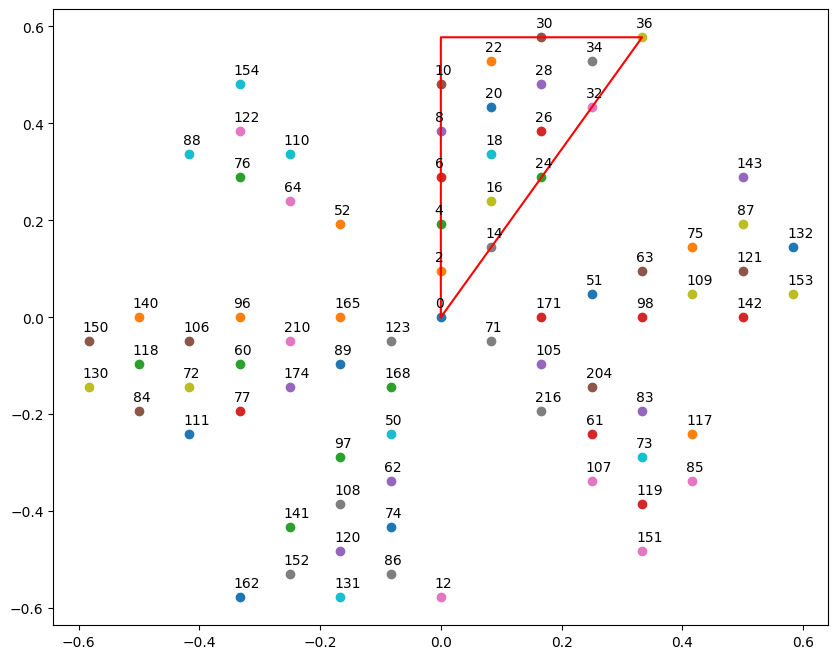

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))

for ind in range(numk): # limit to 50 for the non expanded grid
    if kpoints[ind,2] == 0.: # project on the xy plane
        plt.scatter(kpoints[ind,0],kpoints[ind,1])
        plt.text(kpoints[ind,0]-0.01,kpoints[ind,1]+0.02,ind)
IBZ = [Gamma[0:2],K[0:2], M[0:2],Gamma[0:2]]
plt.plot(*np.column_stack(IBZ),color='red')

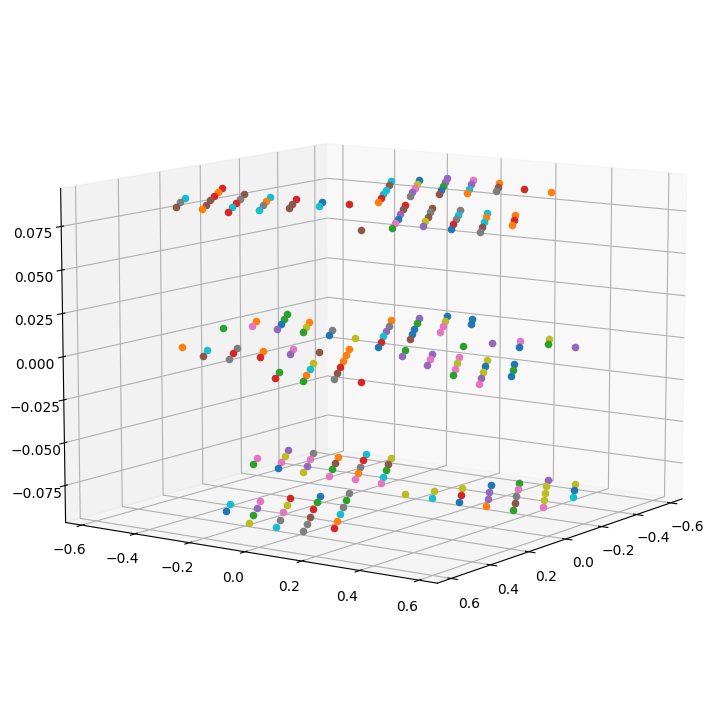

In [17]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.view_init(10, 35)
for ind in range(numk):
    ax.scatter3D(kpoints[ind,0],kpoints[ind,1],kpoints[ind,2])
plt.show()

## Analysis of the YamboQPParser class

This database collects information about the quasi-particle correction

In [11]:
qp_ndb = 'YamboCalculator_test/qp_test1/ndb.QP'
qp_data = P.YamboQPParser(qp_ndb)

Parse file : YamboCalculator_test/qp_test1/ndb.QP
[8, 32, 16, 0, 0, 24]


In [12]:
qp_data.get_info()

YamboQPParser variables structure
QP_table shape (16, 3)
QP_kpts shape (32, 3)
QP_E shape (16, 2)
QP_Eo shape (16,)
QP_Z shape (16, 2)


In [5]:
qp_data.QP_table

array([[1., 1., 1.],
       [2., 2., 1.],
       [3., 3., 1.],
       [4., 4., 1.],
       [5., 5., 1.],
       [6., 6., 1.],
       [7., 7., 1.],
       [8., 8., 1.],
       [1., 1., 2.],
       [2., 2., 2.],
       [3., 3., 2.],
       [4., 4., 2.],
       [5., 5., 2.],
       [6., 6., 2.],
       [7., 7., 2.],
       [8., 8., 2.]], dtype=float32)

In [6]:
from mppi.Utilities.Constants import HaToeV
HaToeV*qp_data.QP_Eo

array([-1.1896851e+01, -1.2164437e-06,  0.0000000e+00,  0.0000000e+00,
        2.5651526e+00,  2.5651526e+00,  2.5651526e+00,  3.1466532e+00,
       -1.1538547e+01, -2.3758364e+00, -4.4534209e-01, -4.4534087e-01,
        2.2944980e+00,  3.2054992e+00,  3.2054992e+00,  5.2848258e+00],
      dtype=float32)

In [7]:
from netCDF4 import Dataset

In [8]:
d = Dataset(qp_ndb)

In [10]:
list(map(int,d['PARS'][:]))

[8, 32, 16, 0, 0, 24]

In [22]:
for dimension in d.dimensions.values():  
    print(dimension)  

<class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000001', size = 1
<class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000003', size = 3
<class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000002', size = 2
<class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000100', size = 100
<class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000006', size = 6
<class 'netCDF4._netCDF4.Dimension'>: name = 'QP_desc_size', size = 24
<class 'netCDF4._netCDF4.Dimension'>: name = 'QP_string_len', size = 100
<class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000016', size = 16
<class 'netCDF4._netCDF4.Dimension'>: name = 'D_0000000032', size = 32


In [26]:
for variable in d.variables.values():  
    print(variable)  

<class 'netCDF4._netCDF4.Variable'>
float32 QP_DB_kind(D_0000000001)
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 HEAD_VERSION(D_0000000003)
unlimited dimensions: 
current shape = (3,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 HEAD_REVISION(D_0000000001)
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 SERIAL_NUMBER(D_0000000001)
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 SPIN_VARS(D_0000000002)
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 HEAD_D_LATT(D_0000000003)
unlimited dimensions: 
current shape = (3,)
filling o

......

## Analysis of the YamboRTCarriersParser class

This database collects information about the time, energy and $k$-points distribution of the 
real-time carriers.

We consider the test case of a RT simulation performed on bulk WSe2 on a 12x12x3 k-sampling (with a Fixsymm procedure due to 
the linear external field in the $x$ direction). The ns.db1 associated built by the Fixsymm is included in the folder

In [23]:
rt_ndb = 'YamboParser_test/rt_results/ndb.RT_carriers'
dft_ndb = 'YamboParser_test/rt_results/ns.db1'

In [24]:
rt_data = P.YamboRTCarriersParser(rt_ndb)
dft_data = P.YamboDftParser(dft_ndb)

Parse file : YamboParser_test/rt_results/ndb.RT_carriers
Parse file : YamboParser_test/rt_results/ns.db1


In [25]:
rt_data.get_info()

YamboRTCarriersParser variables structure
Bands used and number of k-points [ 49  54 222]
kpoints shape (222, 3)
E_bare shape (1332,)
f_bare shape (1332,)
delta_E shape (16, 1332)
delta_f (16, 1332)


In [58]:
d = rt_data.build_f_bare_dos(eta=0.05,dE=0.01)

In [59]:
len(d.dos)

222

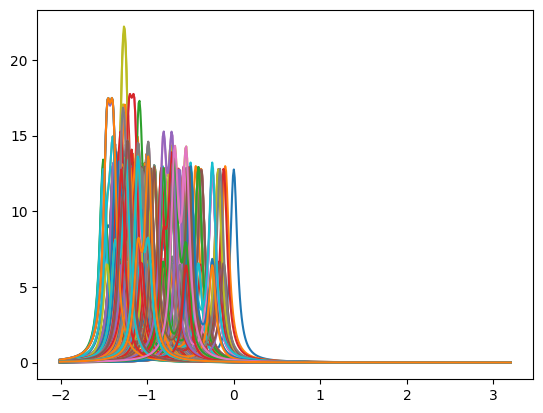

In [60]:
d.plot(plt,legend=False)